# Connect to drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/FDS_project

/content/drive/MyDrive/FDS_project


# Librerie

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

import pandas as pd
import numpy as np

# Inspect the dataset

In [4]:
# import the dataset

df = pd.read_csv('/content/drive/MyDrive/FDS_project/healthcare-dataset-stroke-data.csv')

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df_solution = df.pivot_table(index=['ever_married', 'stroke'], aggfunc='size')

In [ ]:
df_solution

ever_married  stroke
No            0         1728
              1           29
Yes           0         3133
              1          220
dtype: int64

Controlliamo se ci sono missing value

In [ ]:
# inspect the dataset
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only the column "bmi" has nan value.

We will fill it with the mean

In [5]:
# fill the nan value with the mean
df['bmi'] = df['bmi'].fillna(round(df.bmi.mean(),1))

# Some correlation

Supponiamo di star lavorando con un ospedale e vogliamo predirre se i pazienti avranno un ictus, e abbiamo un dataset dei pazienti li dentro e vogliamo vedere se il dataset è abbastanza buono per predirre l'icuts si o no, secondo delle linee guida date dai medici:

```
https://www.medicapoliambulatori.it/news/ictus-tipi-cause-sintomi/

https://www.humanitas.it/malattie/ictus-cerebrale/

```
Infatti il 75% dei casi di ICTUS colpisce le persone con più di 65 anni.

L’incidenza è proporzionale all’età della popolazione: è bassa fino a 40-45 anni, poi aumenta gradualmente per impennarsi dopo i 70 anni.

Tra i fattori di rischio non modificabili:

età;
sesso;

malattie cardiache

obesità

ipertensione arteriosa

In [ ]:
# Take only the dataset with stroke = 1
dfStrocke = df[df['stroke'] == 1].copy()

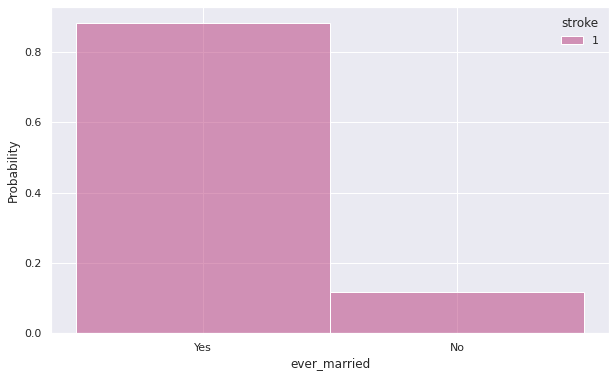

In [ ]:
# set size of sbn figure 
sns.set(rc = {'figure.figsize':(10,6)})
sns.histplot(data = dfStrocke, x='ever_married', hue='stroke', stat = 'probability', palette = 'magma')
plt.show()

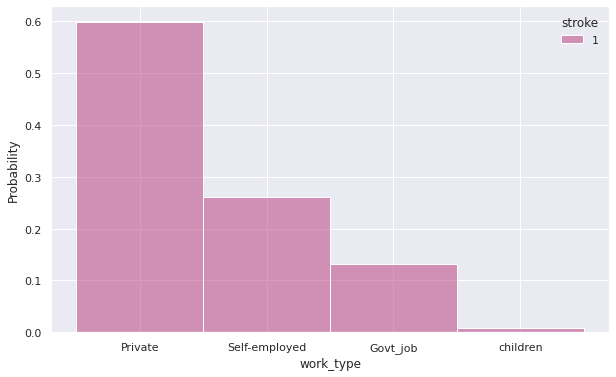

In [ ]:
sns.histplot(data = dfStrocke, x='work_type', hue='stroke', stat = 'probability', palette = 'magma')
plt.show()

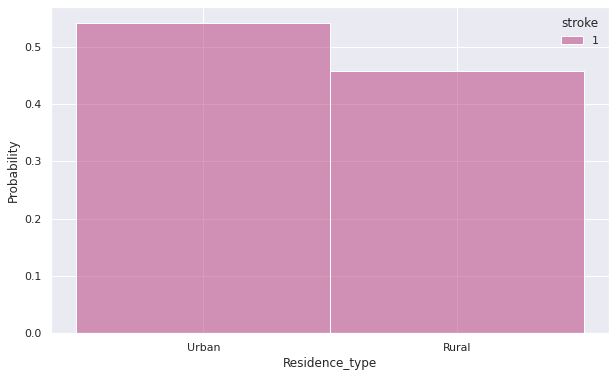

In [ ]:
sns.histplot(data = dfStrocke, x='Residence_type', hue='stroke', bins = 2, stat = 'probability', palette = 'magma')
plt.show()

inutile

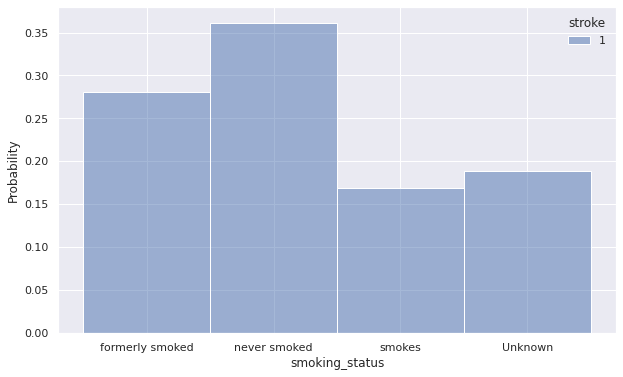

In [ ]:
sns.histplot(data = dfStrocke, x='smoking_status', hue='stroke', stat = 'probability')
plt.show()

We can see that the % of pearson with unknown status of smoking is high relately to the number of pearson who had a stroke.

In [ ]:
unknownSmoke = round(sum((dfStrocke['smoking_status'] == 'Unknown'))/dfStrocke.shape[0] * 100, 2)
unknownSmoke

18.88

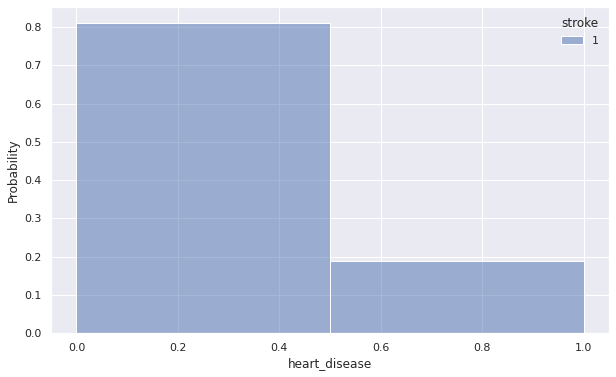

In [ ]:
sns.histplot(data = dfStrocke, x='heart_disease', hue='stroke', bins = 2, stat = 'probability')
plt.show()

Il dataset rispecchia i dati dai siti mediciosi?
si/no spiega

### ScatterPlot

In [ ]:
print('stroke: ',len(df[df['stroke']==1]))
print('no stroke: ',len(df[df['stroke']==0]))

stroke:  249
no stroke:  4861


In [ ]:
stroke1 = df[df['stroke'] == 1].head(240).copy()
stroke0 = df[df['stroke'] == 0].head(200).copy()
strokee = pd.concat([stroke1, stroke0])

In [ ]:
features = (strokee[['age', 'avg_glucose_level', 'bmi', 'stroke']].T).copy()
features = np.array(features, dtype = np.float64)

In [ ]:
print(min(features[1]), max(features[1]))

55.39 271.74


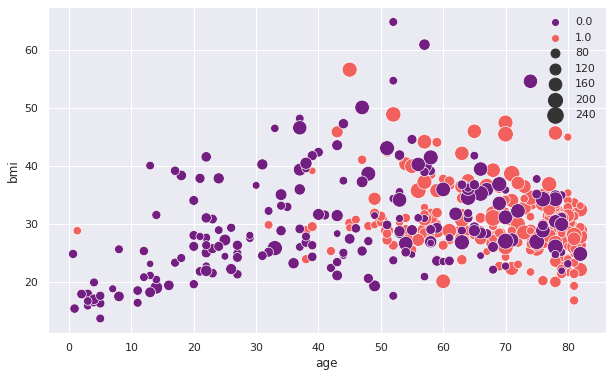

In [ ]:
sns.scatterplot(x = features[0], y = features[2],
             size = features[1], sizes = (55,272), hue = features[3], palette = 'magma')
plt.xlabel('age')
plt.ylabel('bmi');

AGE: >40/50 

BMI: >20

Glucosio alto nei vecchi e bmi alto e chi ha ictus

# Standardize my data and fixing it

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
std = StandardScaler()
cols = ['age','avg_glucose_level', 'bmi']
norm = std.fit_transform(df[cols])

df_norm = df.copy()
df_norm[cols] = pd.DataFrame(norm)

In [8]:
df_norm

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,1.051434,0,1,Yes,Private,Urban,2.706375,1.001199,formerly smoked,1
1,51676,Female,0.786070,0,0,Yes,Self-employed,Rural,2.121559,0.000844,never smoked,1
2,31112,Male,1.626390,0,1,Yes,Private,Rural,-0.005028,0.468543,never smoked,1
3,60182,Female,0.255342,0,0,Yes,Private,Urban,1.437358,0.715384,smokes,1
4,1665,Female,1.582163,1,0,Yes,Self-employed,Rural,1.501184,-0.635746,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,1.626390,1,0,Yes,Private,Urban,-0.494658,0.000844,never smoked,0
5106,44873,Female,1.670617,0,0,Yes,Self-employed,Urban,0.420775,1.442915,never smoked,0
5107,19723,Female,-0.363842,0,0,Yes,Self-employed,Rural,-0.511443,0.221702,never smoked,0
5108,37544,Male,0.343796,0,0,Yes,Private,Rural,1.328257,-0.427880,formerly smoked,0


Residence type, ever_married and gender are one hot encoder 0/1, no need to double the columns

In [9]:
# GENDER: F/M --> 1/0
df_norm.drop(df_norm.loc[df['gender'] =='Other'].index, inplace=True)
df_norm["gender"] = df_norm["gender"].apply(lambda x: 1 if x=="Female" else 0)

# EVER_MARRIED: YES/NO --> 1/0
df_norm["ever_married"] = df_norm["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

# RESIDENCE_TYPE: URBAN/RURAL --> 1/0
df_norm["Residence_type"] = df_norm["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)

In [10]:
df_norm.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,1.051434,0,1,1,Private,1,2.706375,1.001199,formerly smoked,1
1,51676,1,0.786070,0,0,1,Self-employed,0,2.121559,0.000844,never smoked,1
2,31112,0,1.626390,0,1,1,Private,0,-0.005028,0.468543,never smoked,1
3,60182,1,0.255342,0,0,1,Private,1,1.437358,0.715384,smokes,1
4,1665,1,1.582163,1,0,1,Self-employed,0,1.501184,-0.635746,never smoked,1


# Train-Test split

Dropping columns and separate Design matrix from target

In [ ]:
X = df_norm.drop(['id', 'stroke'], axis = 1)
y = df_norm['stroke']

In [ ]:
from sklearn.model_selection import train_test_split
# split the data with 60% in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,
                                  train_size = 0.6)

In [ ]:
# transform the dataframe in dictionary to perform feature extraction
X_train = X_train.to_dict('records')
X_test = X_test.to_dict('records')

In [ ]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse = False, dtype = float)

In [ ]:
X_train = v.fit_transform(X_train)
X_test = v.transform(X_test)

In [ ]:
pd.DataFrame(X_train, columns = v.get_feature_names_out() )

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,smoking_status=Unknown,smoking_status=formerly smoked,smoking_status=never smoked,smoking_status=smokes,work_type=Govt_job,work_type=Never_worked,work_type=Private,work_type=Self-employed,work_type=children
0,1.0,-1.872879,0.133446,-1.298319,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.520706,2.760705,-0.856603,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.874525,1.508031,-0.596771,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.316798,-0.856193,0.507518,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.184116,1.152459,0.598459,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,1.0,-0.673433,-0.431494,1.261032,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3061,0.0,0.786070,-0.534190,0.130760,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3062,0.0,0.034205,-0.252604,-0.064114,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3063,1.0,-0.983025,0.326692,0.104777,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# k-neighbors method

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)

In [ ]:
model.fit(X_train, y_train)
y_KN = model.predict(X_test)

Compare using confusion-matrix

In [ ]:
from sklearn.metrics import confusion_matrix

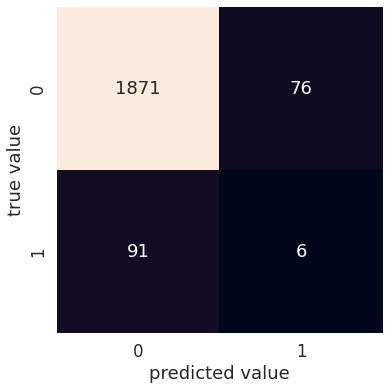

In [ ]:
mat = confusion_matrix(y_test, y_KN)

sns.set(font_scale=1.5) 
sns.heatmap(mat, square = True, annot=True, cbar=False, fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_KN)

0.9182974559686888

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0)

In [ ]:
clf.fit(X_train, y_train)
y_LR = clf.predict(X_test)

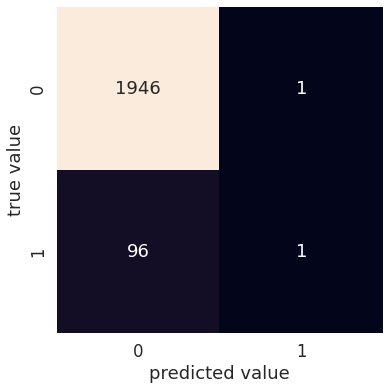

In [ ]:
mat = confusion_matrix(y_test, y_LR)

sns.set(font_scale=1.5) 
sns.heatmap(mat, square = True, annot=True, cbar=False, fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
accuracy_score(y_test, y_LR)

0.9525440313111546

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

ValueError: ignored

# Visualize the data using PCA


In [ ]:
dfplt = df.copy()

# GENDER: F/M --> 1/0
dfplt.drop(dfplt.loc[df['gender'] =='Other'].index, inplace=True)
dfplt["gender"] = dfplt["gender"].apply(lambda x: 1 if x=="Female" else 0)

# EVER_MARRIED: YES/NO --> 1/0
dfplt["ever_married"] = dfplt["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

# RESIDENCE_TYPE: URBAN/RURAL --> 1/0
dfplt["Residence_type"] = dfplt["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)

In [ ]:
Xnot_norm = dfplt.drop(['id', 'stroke'], axis = 1)
Xplt = Xnot_norm.copy()
Xplt = Xplt.to_dict('records')
vplt = DictVectorizer(sparse = False, dtype = float)
Xplt = vplt.fit_transform(Xplt)

In [ ]:
from sklearn.decomposition import PCA     # 1. Choose the model class
PCAmodel = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
PCAmodel.fit(Xplt)                        # 3. Fit to data. Notice y is not specified!
X_2D = PCAmodel.transform(Xplt)           # 4. Transform the data to two dimensions

In [ ]:
X_2D.shape

(5109, 2)

In [ ]:
dfplt['PCA1'] = X_2D[:, 0]
dfplt['PCA2'] = X_2D[:, 1]

In [ ]:
sum(dfplt['stroke'] == 1)

249

In [ ]:
stroke1 = dfplt[dfplt['stroke'] == 1].head(240).copy()
stroke0 = dfplt[dfplt['stroke'] == 0].head(300).copy()
strokee = pd.concat([stroke1, stroke0])

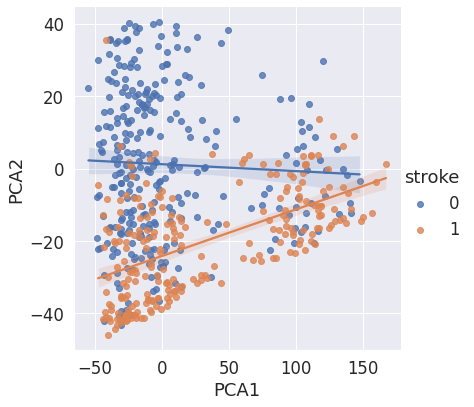

In [ ]:
sns.lmplot(x = "PCA1", y = "PCA2", hue = 'stroke', data = strokee, fit_reg = True, height=6);

### Standardize dataset PCA plot visualitation

In [ ]:
X.shape

(5109, 10)

In [ ]:
Xplt = X.copy()
Xplt = Xplt.to_dict('records')
vplt = DictVectorizer(sparse = False, dtype = float)
Xplt = vplt.fit_transform(Xplt)

In [ ]:
from sklearn.decomposition import PCA     # 1. Choose the model class
PCAmodel = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
PCAmodel.fit(Xplt)                        # 3. Fit to data. Notice y is not specified!
X_2D = PCAmodel.transform(Xplt)           # 4. Transform the data to two dimensions

In [ ]:
dfplt = df_norm.copy()
dfplt['PCA1'] = X_2D[:, 0]
dfplt['PCA2'] = X_2D[:, 1]

In [ ]:
stroke1 = dfplt[dfplt['stroke'] == 1].head(240).copy()
stroke0 = dfplt[dfplt['stroke'] == 0].head(300).copy()
strokee = pd.concat([stroke1, stroke0])

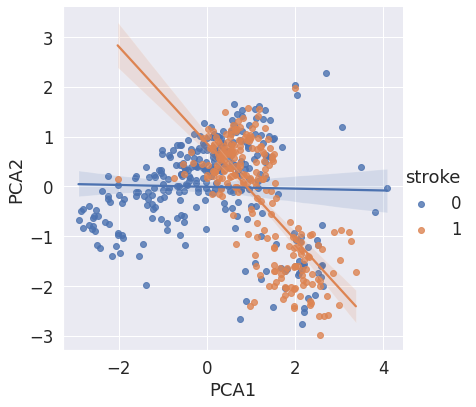

In [ ]:
sns.lmplot(x = "PCA1", y = "PCA2", hue = 'stroke', data = strokee, fit_reg = True, height=6);

Chiedere quale PCA è meglio.

# K-FOLD 

Dataset sbilanciato

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)

In [ ]:
X = df_norm.drop(['id', 'stroke'], axis = 1)
y = df_norm['stroke']

In [ ]:
X = X.to_dict('records')
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse = False, dtype = float)
X = v.fit_transform(X)

In [ ]:
y = y.to_numpy()

In [ ]:
kfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=1)

In [ ]:
def scores(X,y):
  

In [ ]:
# enumerate the splits 
for train_ix, test_ix in kfold.split(X, y):
  # select rows
  train_X, test_X = X[train_ix], X[test_ix]
  train_y, test_y = y[train_ix], y[test_ix]
  

TRAIN: [   0    1    2 ... 5106 5107 5108] TEST: [   9   18   21 ... 5086 5088 5096]
(4087, 17) (1022, 17)
TRAIN: [   1    2    3 ... 5105 5107 5108] TEST: [   0    4    6 ... 5100 5104 5106]
(4087, 17) (1022, 17)
TRAIN: [   0    1    2 ... 5104 5106 5108] TEST: [  12   14   24 ... 5092 5105 5107]
(4087, 17) (1022, 17)
TRAIN: [   0    1    2 ... 5106 5107 5108] TEST: [   3    8   11 ... 5097 5099 5101]
(4087, 17) (1022, 17)
TRAIN: [   0    3    4 ... 5105 5106 5107] TEST: [   1    2    5 ... 5102 5103 5108]
(4088, 17) (1021, 17)


In [ ]:
train_X.shape

(4088, 17)

In [ ]:
test_X.shape

(1021, 17)

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

In [ ]:
pip install mlxtend

In [ ]:
import mlxtend

In [ ]:
mlxtend.__version__

'0.19.0'

In [ ]:
pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 30.5 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


# PROVAAAAAAAAAAAAA

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
# dataset
X = df_norm.drop(['id', 'stroke'], axis = 1)
y = df_norm['stroke']

In [ ]:
# transorm the data
X = X.to_dict('records')
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse = False, dtype = float)
X = v.fit_transform(X)
y = y.to_numpy()

In [ ]:
kfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=1)

In [ ]:
def get_model():
	model = LogisticRegression()
	return model

In [ ]:
# evaluate the model using a given test condition
def evaluate_model(cv):
	model = get_model()
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores), scores.min(), scores.max()


# CROSS VALIDATION TRADE OFF BIAS - VAR

# Train-Test split

Dropping columns and separate Design matrix from target

In [11]:
X = df_norm.drop(['id', 'stroke'], axis = 1)
y = df_norm['stroke']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [16]:
def norm_X(X_total):
  # transform the dataframe in dictionary to perform feature extraction
  X_total = X_total.to_dict('records')
  
  v = DictVectorizer(sparse = False, dtype = float)
  X_total = v.fit_transform(X_total)
  return X_total

In [17]:
X_to_split = norm_X(X)

## Analysis with k-fold of logistic regression

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
def apply_Logistic_Regression(X_tr, y_tr, X_te):
  clf = LogisticRegression(random_state=0)
  clf.fit(X_tr, y_tr)
  y_LR = clf.predict(X_te)
  return y_LR

In [21]:
y = np.array(y)

In [22]:
print(X_to_split.shape, y.shape, type(X_to_split), type(y))

(5109, 17) (5109,) <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# Implement k-Fold

import warnings
warnings.filterwarnings("ignore")

# List of metrics averages
MSE_values = []
accuracy_values = []

# List of tuples (k, MSE_medio_k_esimo, accuracy_medio_k_esimo)
final_values = []

# Tune parameters
k_min = 5
k_max = 7
min_degree = 1
max_degree = 4

for k in tqdm(range(k_min, k_max + 1)):
  for degree in range(min_degree, max_degree + 1):
    kf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)

    for train_index, test_index in kf.split(X_to_split,y ):
      X_train, X_test = X_to_split[train_index], X_to_split[test_index]
      y_train, y_test = y[train_index], y[test_index]

      # Transform with polyfit
      poly = PolynomialFeatures(degree = degree, interaction_only=False, include_bias=False)
      X_train_poly = poly.fit_transform(X_train)
      X_test_poly = poly.transform(X_test)

      y_LR = apply_Logistic_Regression(X_tr=X_train_poly, y_tr=y_train, X_te=X_test_poly)
      MSE_values.append(mean_squared_error(y_test, y_LR))
      accuracy_values.append(accuracy_score(y_test, y_LR))
      # For each degree calculate the mean and add it
    mean_MSE = np.mean(MSE_values)
    mean_accuracy = np.mean(accuracy_values)
    final_values.append((k, degree, mean_MSE, mean_accuracy))
    # Risvuoto le liste
    MSE_values = []
    accuracy_values = []

100%|██████████| 3/3 [01:32<00:00, 30.68s/it]


In [23]:
# Implement k-Fold
import warnings
warnings.filterwarnings("ignore")

# List of metrics averages
MSE_values = []
accuracy_values = []

# List of tuples (k, MSE_medio_k_esimo, accuracy_medio_k_esimo)
final_values = []

min_degree = 1
max_degree = 5

k = 4
for degree in tqdm(range(min_degree, max_degree + 1)):
  kf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)

  for train_index, test_index in kf.split(X_to_split, y):
    X_train, X_test = X_to_split[train_index], X_to_split[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Transform with polyfit
    poly = PolynomialFeatures(degree = degree, interaction_only=False, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    y_LR = apply_Logistic_Regression(X_tr=X_train_poly, y_tr=y_train, X_te=X_test_poly)

    MSE_values.append(mean_squared_error(y_test, y_LR))
    accuracy_values.append(accuracy_score(y_test, y_LR))
    # For each degree calculate the mean and add it
  mean_MSE = np.mean(MSE_values)
  mean_accuracy = np.mean(accuracy_values)
  final_values.append((k, degree, mean_MSE, mean_accuracy))
  # Risvuoto le liste
  MSE_values = []
  accuracy_values = []

 20%|██        | 1/5 [00:00<00:00,  4.61it/s]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[1, 2, 3, 4, 5] [0.04854164139102431, 0.05108636242758911, 0.059307379997377466, 0.06909364916550552, 0.06752625296720723]


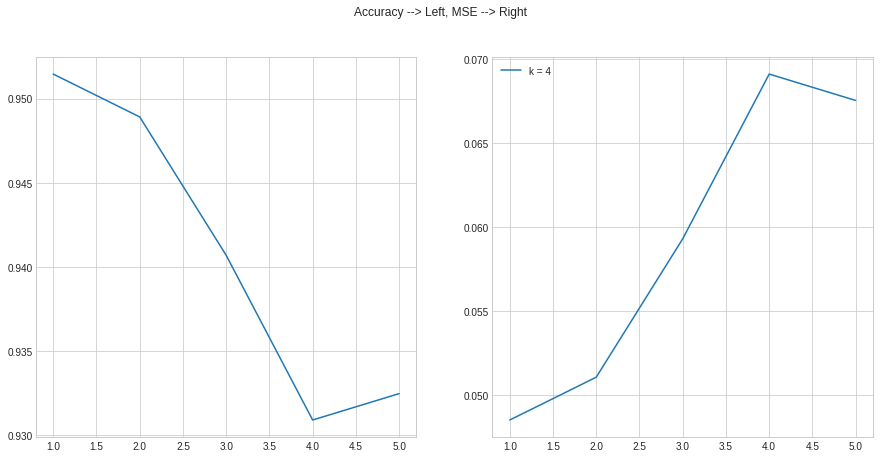

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(15, 7))
fig.suptitle('Accuracy --> Left, MSE --> Right')

# Lists with values
x_values = [tupla[1] for tupla in final_values]
mse_plot =  [tupla[2] for tupla in final_values]
accuracy_plot =  [tupla[3] for tupla in final_values]

print(x_values, mse_plot)

# Plot the accuracy
axs[0].plot(x_values[0:max_degree], accuracy_plot[0:max_degree])


# Plot the MSE
axs[1].plot(x_values[0:max_degree], mse_plot[0:max_degree])


# Legend
legend_list = []
plt.legend([str('k = ' + str(k))], loc='upper left')

# Show
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
bias_knn, var_knn, error_knn = [], [], []
for k in range(1, 15):
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    avg_expected_loss, avg_bias, avg_var  = avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf_knn, X_train, y_train, X_test, y_test, loss='mse', random_seed=123)
    bias_knn.append(avg_bias)
    var_knn.append(avg_var)
    error_knn.append(avg_expected_loss)
plt.plot(range(1,15), error_knn, 'b', label = 'total_error')
plt.plot(range(1,15), bias_knn, 'k', label = 'bias')
plt.plot(range(1,15), var_knn, 'y', label = 'variance')
plt.legend()

TypeError: ignored

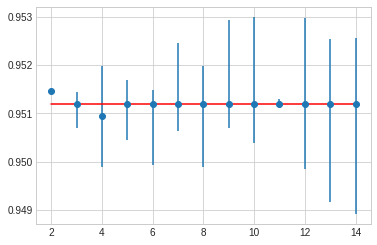

In [28]:
# sensitivity analysis of k in k-fold cross-validation
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
 
# retrieve the model to be evaluate
def get_model():
	model = LogisticRegression()
	return model
 
# evaluate the model using a given test condition
def evaluate_model(cv):
	# get the dataset
	X, y = X_train, y_train
	# get the model
	model = get_model()
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())

# define folds to test
folds = range(2,15)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the test condition
	cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cv)
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()